Euler's Error:  319.73972058331583
Midpoint's Error:  0.9778440730779039
Trapezoidal Error:  0.9778440730824514


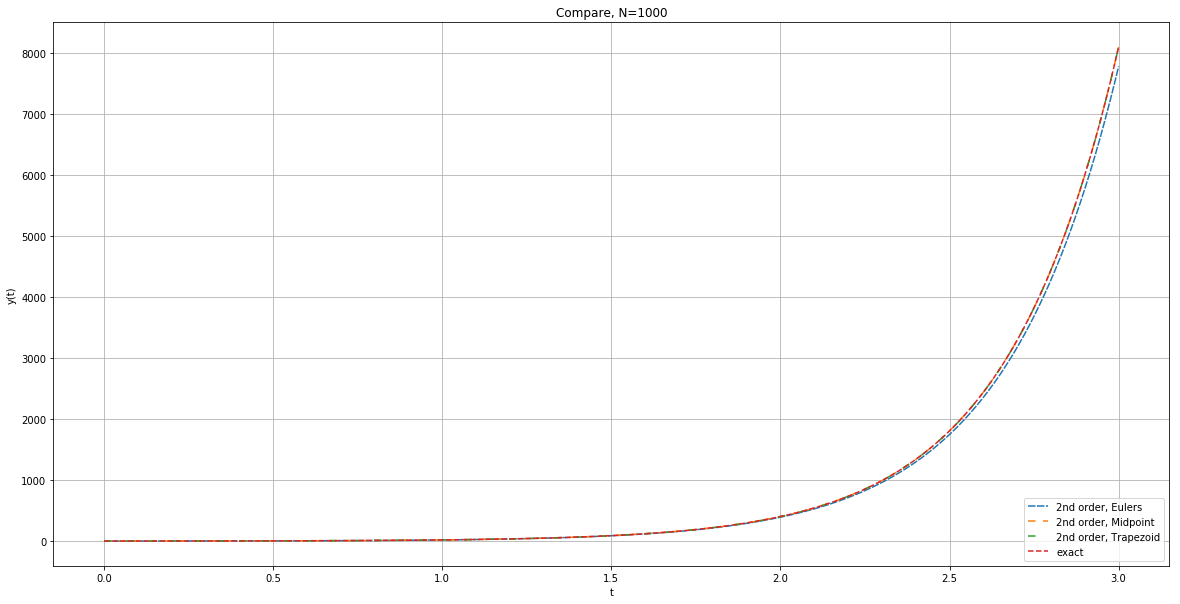

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def dy( x, y ):
    return 3*y

def y( x ):
    return np.exp(3*x) 

def eulers_method( f, a, b, N, IV ):
    h = (b-a)/float(N)
    t = np.arange( a, b+h, h )
    w = np.zeros((N+1,))
    t[0], w[0] = IV
    for i in range(1,N+1):
        w[i] = w[i-1] + h * dy( t[i-1], w[i-1])
    return w

def midpoint_method( f, a, b, N, IV ):
    h = (b-a)/float(N)
    t = np.arange( a, b+h, h )
    w = np.zeros((N+1,))
    t[0], w[0] = IV
    for i in range(1,N+1):
        w[i] = w[i-1] + h * dy( t[i-1] + h/2.0, w[i-1] + h/2.0 * dy( t[i-1], w[i-1] ))
    return w

def trapezoid_method( f, a, b, N, IV ):
    h = (b-a)/float(N)
    t = np.arange( a, b+h, h )
    w = np.zeros((N+1,))
    w_estimate = np.zeros((N+1,))
    t[0], w[0] = IV
    w_estimate[0] = w[0]
    for i in range(1,N+1):
        w_estimate[i] = w[i-1] + h*dy(t[i-1], w[i-1])
        w[i] = w[i-1] + h/2 * (dy(t[i-1], w[i-1]) + dy(t[i], w_estimate[i]))
    return w

a, b = 0.0, 3.0
N = int(1/.001)
h = (b-a)/N
IV = ( 0.0, 1.0 )
t = np.arange( a, b+h, h )
t_full = np.arange(a, b+((b-a)/1000), (b-a)/1000)

w1 = eulers_method(dy, a, b, N, IV )
w2 = midpoint_method(dy, a, b, N, IV )
w3 = trapezoid_method(dy, a, b, N, IV )

plt.figure(figsize=(20,10))
plt.plot(t, w1, label='2nd order, Eulers', linestyle='dashed', dashes=(5, 1))
plt.plot(t, w2, label='2nd order, Midpoint', linestyle='dashed', dashes=(5,5))
plt.plot(t, w3, label='2nd order, Trapezoid', linestyle='dashed', dashes=(5,10))
plt.plot(t_full, y(t_full), label='exact', linestyle='dashed')
plt.title( "Compare, N="+str(N) )
plt.xlabel('t') 
plt.ylabel('y(t)')
plt.legend(loc=4)
plt.grid()

euler_error = abs(w1-y(t)).max()
midpoint_error = abs(w2-y(t)).max()
trapezoid_error = abs(w3-y(t)).max()

print("Euler's Error: ", euler_error)
print("Midpoint's Error: ", midpoint_error)
print("Trapezoidal Error: ", trapezoid_error)

Euler's Error:  0.0025134799614635606
Midpoint's Error:  9.930821535053536e-06
Trapezoidal Error:  2.0860238251818597e-05


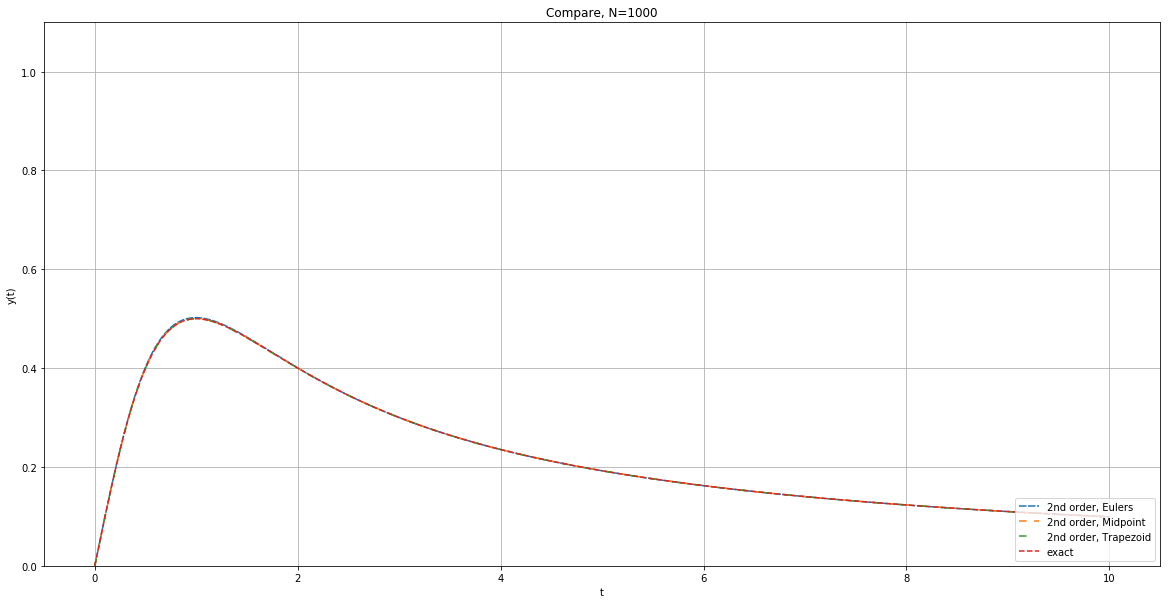

In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def dy( x, y ):
    return 1/(1+(x**2)) - 2*(y**2)

def y(x):
    return x/(1+x**2)

def eulers_method( f, a, b, N, IV ):
    h = (b-a)/float(N)                  # determine step-size
    t = np.arange( a, b+h, h )          # create mesh
    w = np.zeros((N+1,))                # initialize w
    t[0], w[0] = IV                     # set initial values
    for i in range(1,N+1):              # apply Midpoint Method
        w[i] = w[i-1] + h * dy( t[i-1], w[i-1])
    return w

def midpoint_method( f, a, b, N, IV ):
    h = (b-a)/float(N)
    t = np.arange( a, b+h, h )
    w = np.zeros((N+1,))
    t[0], w[0] = IV
    for i in range(1,N+1):
        w[i] = w[i-1] + h * dy( t[i-1] + h/2.0, w[i-1] + h/2.0 * dy( t[i-1], w[i-1] ))
    return w

def trapezoid_method( f, a, b, N, IV ):
    h = (b-a)/float(N)
    t = np.arange( a, b+h, h )
    w = np.zeros((N+1,))
    w_estimate = np.zeros((N+1,))
    t[0], w[0] = IV
    w_estimate[0] = w[0]
    for i in range(1,N+1):
        w_estimate[i] = w[i-1] + h*dy(t[i-1], w[i-1])
        w[i] = w[i-1] + h/2 * (dy(t[i-1], w[i-1]) + dy(t[i], w_estimate[i]))
    return w

a, b = 0.0, 10.0
N = int(1/.001)
h = (b-a)/N
IV = ( 0.0, 0.0 )
t = np.arange( a, b+h, h )
t_full = np.arange(a, b+((b-a)/1000), (b-a)/1000)

w1 = eulers_method(dy, a, b, N, IV )
w2 = midpoint_method(dy, a, b, N, IV )
w3 = trapezoid_method(dy, a, b, N, IV )

plt.figure(figsize=(20,10))
plt.ylim([0, 1.1])
plt.plot(t, w1, label='2nd order, Eulers', linestyle='dashed', dashes=(5, 1))
plt.plot(t, w2, label='2nd order, Midpoint', linestyle='dashed', dashes=(5,5))
plt.plot(t, w3, label='2nd order, Trapezoid', linestyle='dashed', dashes=(5,10))
plt.plot(t_full, y(t_full), label='exact', linestyle='dashed')
plt.title( "Compare, N="+str(N) )
plt.xlabel('t') 
plt.ylabel('y(t)')
plt.legend(loc=4)
plt.grid()

euler_error = abs(w1-y(t)).max()
midpoint_error = abs(w2-y(t)).max()
trapezoid_error = abs(w3-y(t)).max()

print("Euler's Error: ", euler_error)
print("Midpoint's Error: ", midpoint_error)
print("Trapezoidal Error: ", trapezoid_error)